Adjust cell width
<style>
    .jp-Notebook .jp-Cell {
        max-width: 70%; /* or any value like 80%, 1200px, etc. */
    }
</style>


the notebook should be written based on chapters 1. 2. 3... \
shrink the cell dimensions, \
look into the best way to post/ upload a notebook onto github. \ 
make white. look through all the lighting settings. \
look for other notebook projects online and see what they do for schemes. some may not but you'll find one eventually. maybe as someone. 

### Foreword 

One of my goals for this project is to communicate the content such that most people can follow along with the content. This project has theoretical and computational components that may out of the level of most readers, but the logic of each bit of math and code is described in full. Some of the discriptions will be redundant for some, yet necessary for others. 

make sure you sign the top and bottoom of this. Stamp your style on it. name, light descriptiuon of ur goal maybe. 



<br>

# Introduction


The following notebook outlines a personal "pet project" regarding the implementation of a financial model that is used for in pricing options in finance. Explaining an options in depth would exceed the bredth of project so I'll leave these two very useful resources to the reader if required. More information on what an option is in finance, see Link 1 and Link 2.


The model on which this project is based on is known as the Heston Model, published by Steven Heston in 1993 ([Link](https://www.ma.imperial.ac.uk/~ajacquie/IC_Num_Methods/IC_Num_Methods_Docs/Literature/Heston.pdf)). Heston showed that modelling the price of an asset while being proportional/influenced???? on the volatility of the same asset can model asset price evolution reasonably well and can therefore be used to price options. Introducing the effects of the volatility of the underlying adressed a problem in the then popular Black-Scholes Equation (Link).

This project is a simple case study of the Heston model. In this pet project, I...

1. Summarize the relevant theory from Heston's 1993 paper.
2. Explain the logic and goals of the project,
3. Introduce the S&P 500 Option data on which we'll study,
4. Implement the Heston Model in code (python),
5. Investigate the raw model and show it's behaviour under change in different parameters, 
6. Outline and implement calibration methods in order to accurately price options,
7. Test the calibrated model against market data to test model accuracy,
8. Investigate and perform advanced tests on the calibrated model,
9. Conclusions,


<br>

## 1. Theory

Steven Heston's 1993 paper shows that price of an asset at time $t$, $S_t$ can be modelled using the diffusion model

$$
dS_t = rS_tdt+\sqrt{v_t}S_tdW_{S,t} \quad (1)
$$

where $r$ is the risk-free interest rate and $dW_{S,t}$ is a Wiener process (ADD LINK). Heston goes to show that the volatility of an asset $v_t$ can be modelled through

$$
dv_t = \kappa (\theta - v_t)dt + \sigma \sqrt{v_t}dW_{v,t} \quad (2)
$$

where $\kappa$ is the rate at which the volatility reverts to it's long-term mean $\theta$, and $\sigma$ is the volatiliy of volatility (vol of vol). $dW_{v,t}$ is another Wiener process and is correlated to $dW_{S,t}$ via

$$
dW_{S,t} \cdot dW_{v,t} = \rho dt \quad (3)
$$

<br>

<br>
As with the case of the Black-Scholes equation, the Heston model assumes a solution in the form 

$$
C(S,V, T) = SP_1 - Ke^{-T \ (r-q)}P_2 \quad (4)
$$ 

where "the  first  term  is  the  present  value  of  the  spot  asset  upon  optimal
exercise,  and  the  second  term  is  the  present  value  of  the  strike-price
payment". The terms $P_j$ are the conditional probabilities that the the option will expire in-the-money. 

<br>

Determining the probabilities $P_j$ is the main focus of computation. Such probabilities can be found by computing 

$$
P_j(x,V_t,T,K) = \frac{1}{2} + \frac{1}{\pi} \int^{+\infty}_{\phi=0} Re\left[ \frac{e^{-i\phi k} f_j(\phi |x_t,V_t,t, T)}{i\phi}\right] d\phi \quad (5)
$$

the characteristic functions are given by 

$$
f_j(\phi |x_t,V_t,t, T) = \text{exp} \{C_j(\phi|\tau)+D_j(\phi|\tau)V_t + i\phi x_t \}
$$

where

$$
C_j(\phi| \tau) = i\phi(r-q)\tau + \frac{a}{\sigma^2}\left[(b_j-i\phi\rho\sigma + d_j)\tau - 2\text{ln}\frac{1-g_je^{d_j \tau}}{1-g_j}\right]
$$

$$
D_j(\phi | \tau)= [\frac{b_j - i\phi \rho \sigma + d_j}{\sigma^2}] [\frac{1- e^{d_j \tau}}{1-g_j e^{d_j \tau}}]
$$

$$
g_j(\phi)=\frac{b_j - i\phi \rho \sigma + d_j}{b_j - i\phi \rho \sigma - d_j}
$$

$$
d_j(\phi)=\sqrt{(i\phi \rho \sigma - b_j)^2 - \sigma^2 (2 i \phi u_j - \phi^2)}
$$

$$
a=\kappa \theta
$$

$$
u_{j= 1,2}=\left[\frac{1}{2} , -\frac{1}{2}\right]
$$

$$
b_{j=1,2}= [\kappa-\rho\sigma ,  \kappa]
$$

Computing Equation 4 returns the price of a call option given sufficient option contract information.

# Black-Box Perspective

This model calculates the price of options provided that all option contract variables and asset parameters are known.


### Option Contract Variables
Contract <u>Variables</u> are a set of information about the option contract that is *known*. By analogy, when someone signs into a mortgage contrat for a house, the borrower is aware of specific terms such as the loan amount, interest rate, loan term, down payment, etc. Similarly, there are a set of variables that are known to the buyer of an option. These are:


* **$S_t$** - Spot Price. &nbsp; &nbsp; &nbsp; &nbsp; The price of the underlying asset at the time of buying the option.
* **$K$** - Strike Price. &nbsp; &nbsp; &nbsp; &nbsp; The price in which the asset may be bought once the contract matures.
* **$T$** - Time to Maturity. &nbsp; &nbsp; &nbsp; &nbsp; The time (in years) until the the contract may be executed.
* **$r$** - Rate. &nbsp; &nbsp; &nbsp; &nbsp; The risk-free interest rate of the asset. 
* **$\text{Ask}$** - Ask Price. &nbsp; &nbsp; &nbsp; &nbsp; The price at which the underlying may be bought for at maturity.  


### Asset Parameters
Unlike contract variables which are known before the purchase of the contract, there are a set of *parameters* which describe mathematical properties of the underlying asset. These parameters are not perfectly deterministic and are subject to change through time. For example, the volatility of an asset can be estimated to a good approximation, but it is subject to change as time and the market evolve. There are no laws in which these parameters can be calculated, but there are methods (such as model calibration) which can be used to determine good approximations. 

* **$V_t$** - Spot Volatility. &nbsp; &nbsp; &nbsp; &nbsp; The volatility of the underlying stock at the time of buying the option. 
* **$\sigma$** - Volatility of the Volatility (vol of vol). &nbsp; &nbsp; &nbsp; &nbsp; The rate at which the volatility of an asset changes over time. Reflects uncertainty in an asset's volatitlity.
* **$\theta$** - Long-Term Mean of the Volatility. &nbsp; &nbsp; &nbsp; &nbsp; The average (mean) value of the asset's volatility. 
* **$\kappa$** - Rate of Mean Reversion. &nbsp; &nbsp; &nbsp; &nbsp; The rate at which the asset's volatility returns back to the long-term mean $\theta$.
* **$\rho$** - Correlation Factor. &nbsp; &nbsp; &nbsp; &nbsp; Dictates the degree to which the price and volatility of an asset are correlated.  

# Introducing the Logic of Implementing and Using the Heston Model


As eluded to earlier, the model *variables* is information that we get from data. This project uses a collection of S&P 500 option contract data from 2018 to test the model on. When the model is first built, as the researcher, we dont have any knowledge of what the asset parameters should be valued at. We can make good guesses but we will rely on a technique called model calibration to estimate the value of these parameters. 

After building the model and showing that it works on arbitrary contract variables and asset parameters, we'll calibrate the model to estimate the model parameters on a specific date, then use these parameter values to accurately price options. 

The following code will follow this logic by first introduing the data, then implementing the Heston model, testing it on arbitrary data, then calibrating the model to market data to price future option prices. 

# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.optimize import minimize

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:70% !important; }"))

C:\Users\grant\AppData\Local\Temp\ipykernel_32392\2267850314.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# 1. Data

The following dataframe contains 8963 S&P 500 call options from January - December, 2018. Option information is shown below.

<!-- * Date the option was listed.
* Maturity: The number of days until the contract matures.
* Strike: The price to acquire the underlying at maturity.
* Ask: The price of the call option.    SWITCH THIS TO BE AFTER THE DATE IN THE EXCEL TOO 
* Implied Volatility: PUT THIS AT THE END
* Vega/kappa: PUT THIS AT THE END 
* Rate: The rate at which the underlying is growing.
* Spot: The price of the S&P 500 at the date of the listing. PUT THIS TOWARDS THE BEGINNING -->



In [3]:
df = pd.read_excel('Data\S&P_500.xlsx',
                    index_col=False,
                    header=0)
df['Date of Price'] = pd.to_datetime(df['Date of Price'])
df.head()

,Date of Price,Maturity,Strike,min Ask,Implied Volatility,Vega/Kappa,Rate,Spot
0,2018-01-16,94,1200,1575.6,0.612367,9.031871,1.45,2776.419922
1,2018-01-16,94,1350,1426.5,0.551055,13.246970,1.45,2776.419922
2,2018-01-16,94,1400,1376.8,0.530554,14.793470,1.45,2776.419922
3,2018-01-16,94,1450,1327.3,0.521513,18.835150,1.45,2776.419922
4,2018-01-16,94,1500,1277.4,0.492622,18.771730,1.45,2776.419922


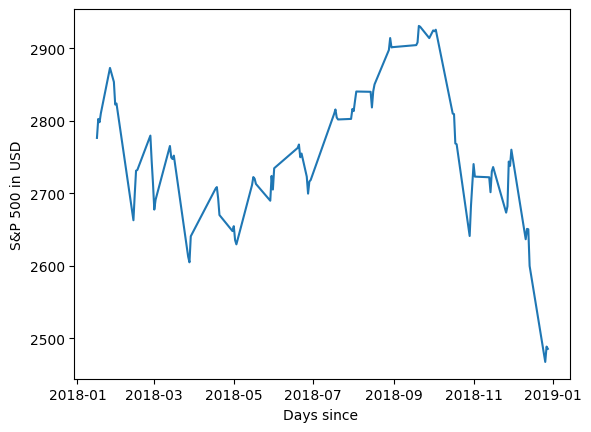

First Date: 2018-01-16 00:00:00, Last Date: 2018-12-28 00:00:00
Number of Unique Days: 98
Average Number of Strikes per Day: 91.45918367346938
Min Number of Strikes per Day: 26
Max Number of Strikes per Day: 140
Median Number of Strikes per Day: 98.0


In [4]:
sampled_df = df.groupby(df['Date of Price'].dt.date).apply(lambda x: x.sample(1)).reset_index(drop=True)
price_array = sampled_df.iloc[:,-1].astype(float).to_numpy()
# date_array = sampled_df['Date of Price'].dt.date.to_numpy()
date_array = pd.to_datetime(sampled_df['Date of Price'])
# plt.plot(price_array)
plt.plot(date_array, price_array)
plt.ylabel('S&P 500 in USD')
plt.xlabel('Days since ')
plt.show()

print(f"First Date: {df.iloc[0,0]}, Last Date: {df.iloc[-1,0]}")
N_days = df['Date of Price'].nunique()
counts_per_day = df.groupby(df['Date of Price'].dt.date).size()
print(f"Number of Unique Days: {N_days}")
print(f"Average Number of Strikes per Day: {counts_per_day.mean()}")
print(f"Min Number of Strikes per Day: {counts_per_day.min()}")
print(f"Max Number of Strikes per Day: {counts_per_day.max()}")
print(f"Median Number of Strikes per Day: {counts_per_day.median()}")

# 2. The Heston Model and Intergration Method

Simpson's 3/8 Rule integration technique was used for this project for a couple of reasons. First, it's an adaptive technique (can be used genreally on functions), HANDLES ENDPOITNS AND SINGULARITIES WELL???, and is simple to implement. 

In [4]:
### INTEGRATION PARAMETERS 
integration_a = 0.0001
integration_b = 200
integration_n = 500
int_params = integration_a, integration_b, integration_n


# Simpson's integration method
def simpson(f, P1P2, params, args, integration_parameters = int_params):

    """
    args: 
        f: the integrand function
        P1P2 = [1,2]: for the two probabilities in Equation 5
        params type = array or tuple? : 
            Heston model parameters V_t, kappa, sigma, rho, theta
        integration_parameters: tuple
            a,b,n = integration start, stop, and abscissas (right word?)
    """

    a,b,n = integration_parameters
    wrapped_function = lambda phi: f(phi, P1P2, params, args)
    
    h = (b-a)/n
    xs = np.linspace(a,b,n+1)
    ys = wrapped_function(xs)

    if (n % 2) != 0:
        raise ValueError("n must be divisable by 2.")
    
    AA = ys[0] + ys[-1] + 4*np.sum(ys[1:-1:2]) + 2*np.sum(ys[2:-2:2])     # Check that this is right

    return (h/3)*AA

The following code is used to calculate the price of an option, given sufficient information on the option. This works by calling `Call()`, which executes the integration of `Heston()` and calculates the price using Equation 4. 

In [5]:
def integrand(phi, P1P2, params, args):

    """
    Characteristic function f(phi) that will be integrated over in Equation (1)

    Args:
            S_t: underlying price at time t
            V_t: underlying variance at t
            phi: integration parameter
            r: risk-free rate
            q: dividend yield
            T: time to maturity
            sigma: vol of vol???????
            rho: correlation factor
            theta: long term mean of the volatility 

    Outputs:
            f_j(phi)
    
    
    """

    q = 0
    t = 0

    V_t, rho, kappa, theta, sigma = params
    S_t, K, T, r = args
    
    C,D,g,d,f=np.zeros(2),np.zeros(2),np.zeros(2),np.zeros(2),np.zeros(2)
    b=np.array([kappa - rho*sigma, kappa])[P1P2-1]
    u=np.array([0.5, -0.5])[P1P2-1]
    a=kappa*theta

    xx = 1j*phi*rho*sigma
    tau = T-t
    k = np.log(K)

    d = np.sqrt(np.power(xx - b,2) - np.power(sigma,2) * (2j*phi*u - np.power(phi,2)))
    g = (b - xx + d) / (b - xx - d)

    C = 1j*phi*(r-q)*tau + (a/np.power(sigma,2)) * ( (b-xx+d)*tau - (2*np.log( (1-g*np.exp(d*tau)) / (1-g) )) )
    D = ((b - xx + d) / (np.power(sigma,2))) * ((1-np.exp(d*tau))/(1-g*np.exp(d*tau)))

    f = np.exp(C + D*V_t + 1j*phi*np.log(S_t))
       

    return (np.exp(-1j*phi*k)*f/(1j*phi)).real

In [ ]:
def call(f, params, args):
    
    q = 0
    t = 0

    S_t, K, T, r = args

    P1 = (1/2) + (1/np.pi) * simpson(f, P1P2=1, params=params, args=args)
    P2 = (1/2) + (1/np.pi) * simpson(f, P1P2=2, params=params, args=args)

    return S_t*P1 - K*np.exp(-(r-q)*(T-t))*P2


3. we have to at least show that it's working. plot random unclaibrated parameters compared to market data. 


4. Model Calibration

First, some background on model calibration. 

Remember, the HModel() 

go through the logic of calibrating, and testing the model. 

# Model Calibration

### Defining an objective function

$$
some equation 
$$


In [7]:
def objectivefcn(params, S_t, K, T, r, Ask):

    """
    Inputs:
        Model parameters to be calibrated (params): V_t, rho, kappa, theta, sigma
        Market data of the underlying: S_t, K, T, r, Ask, vega, impVol

    Outputs:
        Sum of squared errors (SSE) 
    """

    Error = []
    other_args = Ask

    for i in range( len(S_t) ):
        model_args = S_t[i], K[i], T[i], r[i]
        Error.append( np.power(call(integrand, params, model_args) - Ask[i], 2) )

    return np.array(Error).sum()


### Set-up Calibration and Test Datasets 

In [30]:
# Define calibration and test data -> SET "calibration_data" TO THE DF YOU WANT TO CALIBRATE WITH
day01 = df[df['Date of Price'] == '2018-01-16']
day02 = df[df['Date of Price'] == '2018-01-17']

month01 = df[df['Date of Price'].dt.month == 1]
test_day26 = df[df['Date of Price'] == '2018-01-26']
test_month = df[df['Date of Price'].dt.month == 2]



# Set calibration and test df
calibration_data = day01
test_data = test_day26

### Initial guess of parameters

In [9]:
# Initial parameter guess
V_t = 0.07
kappa = 1.5
sigma = 0.01
rho = -0.3
theta = 0.08
params0 = [V_t, rho, kappa, theta, sigma]

In [24]:
def calibrate_data(date, data = df, calibration_method = 'SLSQP'):

    calibration_data = data[data['Date of Price'] == '2018-01-16']
    calibration_args = calibration_data['Spot'], calibration_data['Strike'], calibration_data['Maturity'], calibration_data['Rate'], calibration_data['min Ask']

    return minimize(objectivefcn, x0=params0, args = calibration_args, method = calibration_method, tol=1e-6)


In [25]:
calibrate_data('2018-02-14')

C:\Users\grant\AppData\Local\Temp\ipykernel_2432\3998999857.py:41: RuntimeWarning: overflow encountered in exp
  C = 1j*phi*(r-q)*tau + (a/np.power(sigma,2)) * ( (b-xx+d)*tau - (2*np.log( (1-g*np.exp(d*tau)) / (1-g) )) )
C:\Users\grant\AppData\Local\Temp\ipykernel_2432\3998999857.py:41: RuntimeWarning: invalid value encountered in multiply
  C = 1j*phi*(r-q)*tau + (a/np.power(sigma,2)) * ( (b-xx+d)*tau - (2*np.log( (1-g*np.exp(d*tau)) / (1-g) )) )
C:\Users\grant\AppData\Local\Temp\ipykernel_2432\3998999857.py:41: RuntimeWarning: invalid value encountered in log
  C = 1j*phi*(r-q)*tau + (a/np.power(sigma,2)) * ( (b-xx+d)*tau - (2*np.log( (1-g*np.exp(d*tau)) / (1-g) )) )
C:\Users\grant\AppData\Local\Temp\ipykernel_2432\3998999857.py:42: RuntimeWarning: overflow encountered in exp
  D = ((b - xx + d) / (np.power(sigma,2))) * ((1-np.exp(d*tau))/(1-g*np.exp(d*tau)))
C:\Users\grant\AppData\Local\Temp\ipykernel_2432\3998999857.py:42: RuntimeWarning: invalid value encountered in multiply
  D =

 message: Iteration limit reached
 success: False
  status: 9
     fun: nan
       x: [       nan        nan        nan        nan        nan]
     nit: 100
     jac: [       nan        nan        nan        nan        nan]
    nfev: 1688
    njev: 100

In [27]:
SLSQP = [ 1.261e-02, -6.358e-01,  3.076e-02,  5.771e-02,  4.050e-01]

### Test the Calibration

The function below plots the modelled option prices vs market prices if multiple_days == Fales.

else, it plots the error of multiple days idk 

In [ ]:
def check_calibration(data, params, multiple_days = False): 

    calls = []
    error = []
    multiple_day_error = []
    unique_dates = data['Date of Price'].dt.date.unique()

    if multiple_days:
        grouped_data = data.groupby(data['Date of Price'].dt.date)

        for date, group in grouped_data:

            S_t = group['Spot']
            K = group['Strike']
            T = group['Maturity']/365
            r = group['Rate']/100
            Ask = group['min Ask']

            # other
            vega = group['Vega/Kappa']
            impVol = group['Implied Volatility']

            for i in range(len(group)):
            
                model_args = S_t.iloc[i], K.iloc[i], T.iloc[i], r.iloc[i]
                CALL = (call(integrand, params, model_args))
                error.append(abs(CALL - Ask.iloc[i]))
            
            multiple_day_error.append(np.array(error).sum())
            error = []

        plt.plot(multiple_day_error)

    else:

        S_t = data['Spot']
        K = data['Strike']
        T = data['Maturity']/365
        r = data['Rate']/100
        Ask = data['min Ask']
        vega = data['Vega/Kappa']
        impVol = data['Implied Volatility']
        
        for i in range(len(S_t)):
            model_args = S_t.iloc[i], K.iloc[i], T.iloc[i], r.iloc[i]
            calls.append(call(integrand, params, model_args))
            error.append(abs(calls[i] - Ask.iloc[i]))
    
        plt.plot(K, calls, label = "Model Calls")
        plt.plot(K, Ask, label = "Market Calls")
        plt.legend()
        plt.xlabel("Strikes")
        plt.ylabel("Call Values")
        plt.show()

        print(f'Model-Market error (sum of difference) = {np.array(error).sum()}')

    return

Let's look at how the model performs when we test it on the same day that we trained it on. In reality this doesnt give us too much insight since the calibration and testing are done on the sane datafrane


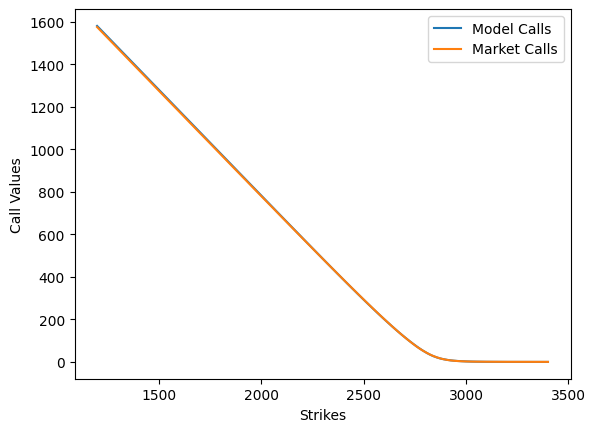

Model-Market error (sum of difference) = 121.88659513533186


In [29]:
check_calibration(day01, SLSQP)

Let's see how it does on the next day.

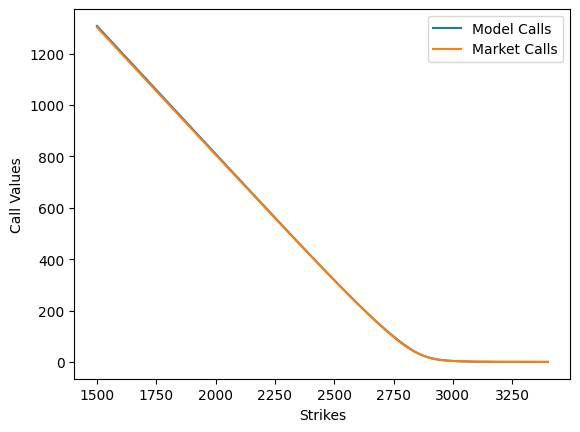

Model-Market error (sum of difference) = 140.65205126909453


In [32]:
check_calibration(day02, SLSQP)

let's try modelling for an entire month

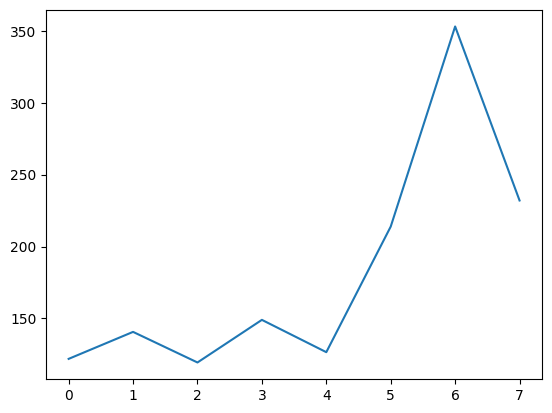

In [36]:
check_calibration(month01, SLSQP, multiple_days=True)

and for the entire year

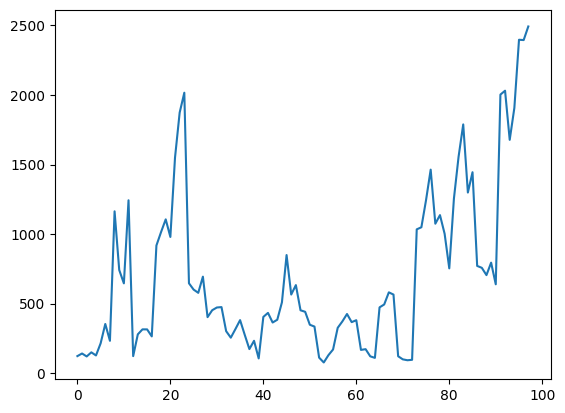

In [37]:
check_calibration(df, SLSQP, multiple_days=True)

mapping how well the model performs on longer timeframes gives us insight on how well the model performs on determining the values of the asset paramers. This is why we expect the model to perform worse the modeled timeframe increases as the model parameters chance with time. 